# Matplotlib fundamentals

In [2]:
import pandas as pd
import duckdb

df = pd.read_csv("data/norway_new_car_sales_by_make.csv")

df.head()




,Year,Month,Make,Quantity,Pct
0,2007,1,Toyota,2884,22.7
1,2007,1,Volkswagen,2521,19.9
2,2007,1,Peugeot,1029,8.1
3,2007,1,Ford,870,6.9
4,2007,1,Volvo,693,5.5


In [3]:
df.shape

(4377, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4377 entries, 0 to 4376
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      4377 non-null   int64  
 1   Month     4377 non-null   int64  
 2   Make      4367 non-null   object 
 3   Quantity  4377 non-null   int64  
 4   Pct       4377 non-null   float64
dtypes: float64(1), int64(3), object(1)
memory usage: 171.1+ KB


In [102]:
df_quantity_brand = duckdb.query("""
            SELECT
                make as Brand,
                SUM(quantity) as Quantity
            FROM
                df
            GROUP BY
                make
            ORDER BY
                Quantity DESC
            """).df()
df_quantity_brand.head()

,Brand,Quantity
0,Volkswagen,206669.0
1,Toyota,168177.0
2,Volvo,99937.0
3,Ford,99713.0
4,BMW,73315.0


# Bar char

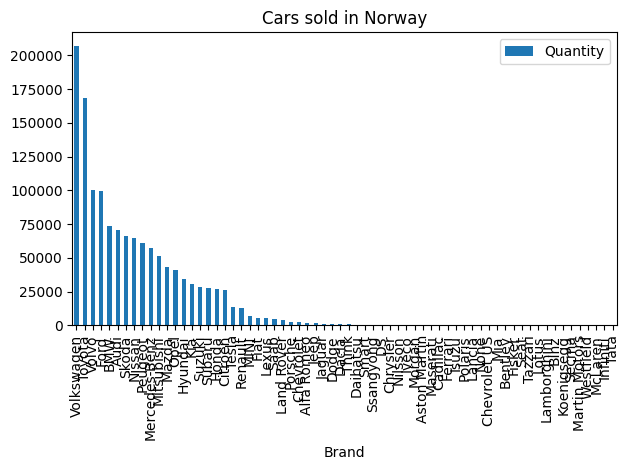

In [14]:
ax = df_quantity_barnd.plot(kind= "bar", x= "Brand", y= "Quantity", title= "Cars sold in Norway")
fig = ax.get_figure()
fig.tight_layout()
fig.savefig("figures/Cars_sold_in_Norway")

## Second iteration

In [21]:
df_quantity_brand_top_10 = df_quantity_barnd.iloc[:10]
df_quantity_brand_top_10

,Brand,Quantity
0,Volkswagen,206669.0
1,Toyota,168177.0
2,Volvo,99937.0
3,Ford,99713.0
4,BMW,73315.0
5,Audi,70475.0
6,Skoda,66007.0
7,Nissan,64535.0
8,Peugeot,61033.0
9,Mercedes-Benz,57557.0


In [24]:
df["Year"].unique()

array([2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017])

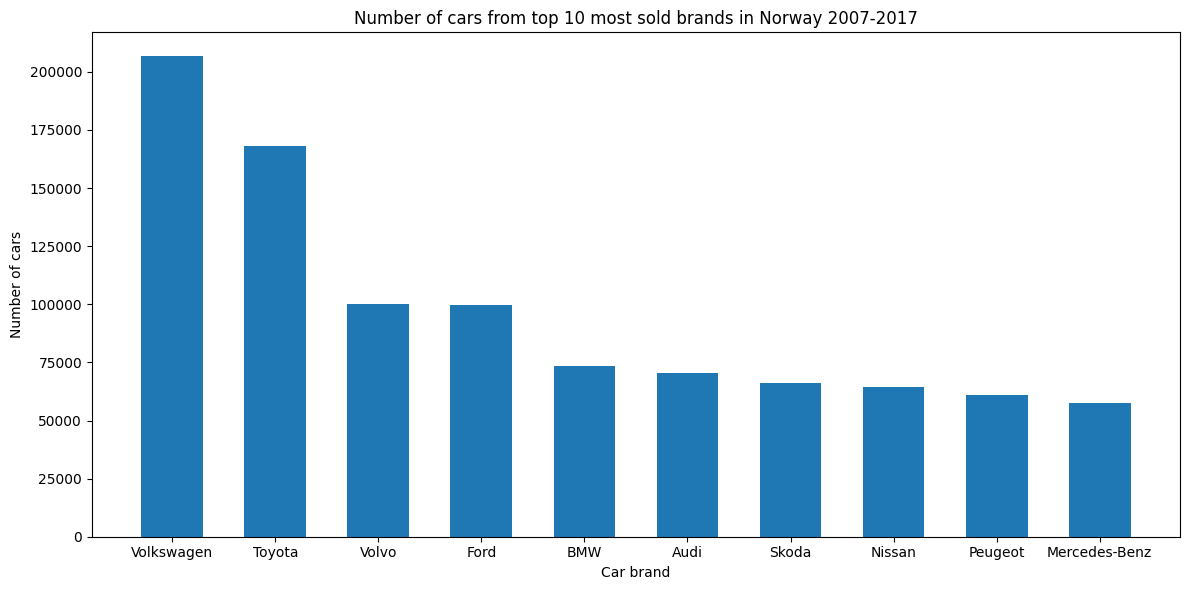

In [87]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize= (12,6))

ax.bar(x= df_quantity_brand_top_10["Brand"], height= df_quantity_brand_top_10["Quantity"], width= 0.6)


ax.set(title= "Number of cars from top 10 most sold brands in Norway 2007-2017",
       xlabel = "Car brand",
       ylabel= "Number of cars")

fig = ax.get_figure()
fig.tight_layout()
fig.savefig("figures/cars2_bar.png")

## Stacked bar

In [29]:
df.head()

,Year,Month,Make,Quantity,Pct
0,2007,1,Toyota,2884,22.7
1,2007,1,Volkswagen,2521,19.9
2,2007,1,Peugeot,1029,8.1
3,2007,1,Ford,870,6.9
4,2007,1,Volvo,693,5.5


In [103]:
df_month_brand = duckdb.query("""
            SELECT
                year || '-' || LPAD(CAST(month AS VARCHAR), 2, '0') AS date,
                make AS Brand,
                SUM(quantity) AS Quantity
            FROM
                df
            WHERE make IN ('Volvo', 'Volkswagen', 'Toyota')
            GROUP BY
                year, month, make
            ORDER BY
                year, month;
            """
            ).df()
df_month_brand["date"] = pd.to_datetime(df_month_brand["date"], format="%Y-%m")
df_month_brand

,date,Brand,Quantity
0,2007-01-01,Toyota,2884.0
1,2007-01-01,Volvo,693.0
2,2007-01-01,Volkswagen,2521.0
3,2007-02-01,Volkswagen,1517.0
4,2007-02-01,Toyota,1885.0
...,...,...,...
358,2016-12-01,Toyota,1238.0
359,2016-12-01,Volvo,1235.0
360,2017-01-01,Volkswagen,1688.0
361,2017-01-01,Toyota,1526.0


In [72]:
df_month_brand_pivot = df_month_brand.pivot(index="date", columns= "Brand", values= "Quantity").fillna(0)

In [75]:
df_month_brand_pivot.loc["2016-01":"2016-05"]

Brand,Toyota,Volkswagen,Volvo
date,,,
2016-01-01,1106.0,1743.0,643.0
2016-02-01,1374.0,2044.0,732.0
2016-03-01,1537.0,2236.0,687.0
2016-04-01,1432.0,3017.0,748.0
2016-05-01,1687.0,2222.0,619.0


In [76]:
df_month_brand_pivot.loc["2016"]


Brand,Toyota,Volkswagen,Volvo
date,,,
2016-01-01,1106.0,1743.0,643.0
2016-02-01,1374.0,2044.0,732.0
2016-03-01,1537.0,2236.0,687.0
2016-04-01,1432.0,3017.0,748.0
2016-05-01,1687.0,2222.0,619.0
2016-06-01,1603.0,2287.0,766.0
2016-07-01,1127.0,2076.0,635.0
2016-08-01,1824.0,2359.0,463.0
2016-09-01,1823.0,2084.0,763.0


In [81]:
months = df_month_brand_pivot.loc["2016"].index.month_name()

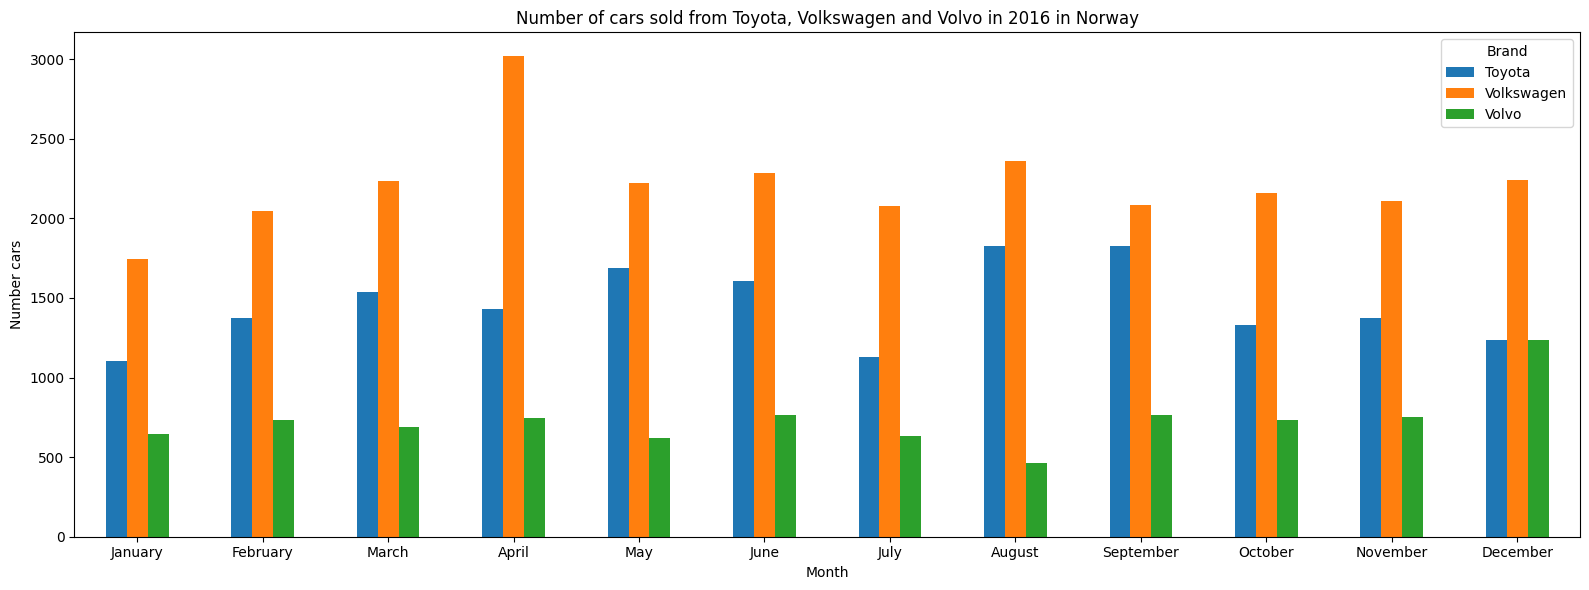

In [88]:
ax = df_month_brand_pivot.loc["2016"].plot(kind= "bar", figsize= (16,6))
ax.set_xticklabels(months, rotation = 0);
ax.set(
    title= "Number of cars sold from Toyota, Volkswagen and Volvo in 2016 in Norway",
    xlabel= "Month",
    ylabel= "Number cars"
)

fig = ax.get_figure()
fig.tight_layout()
fig.savefig("figures/cars_stacked_bar.png")

## Line charts

In [94]:
df_yearly_quantity = duckdb.query(
    """
        SELECT
            year,
            SUM(quantity) AS Quantity
        FROM
            df
        GROUP BY
            year
        ORDER BY
            year;
    """
).df().set_index("Year")

df_yearly_quantity

,Quantity
Year,
2007,129195.0
2008,110617.0
2009,98675.0
2010,127754.0
2011,138345.0
2012,137967.0
2013,142151.0
2014,144202.0
2015,150686.0


### First iteratiton 

<Axes: xlabel='Year'>

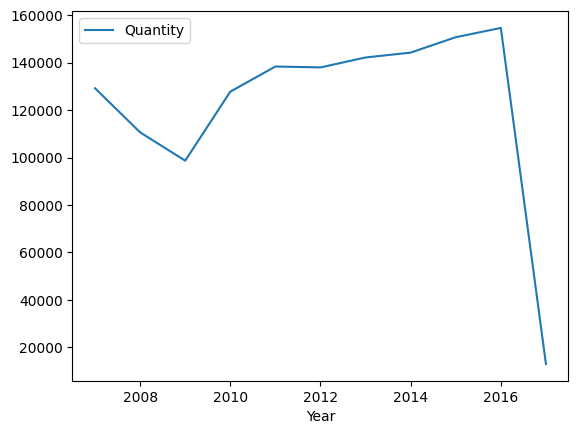

In [95]:
df_yearly_quantity.plot()

### Second iteration

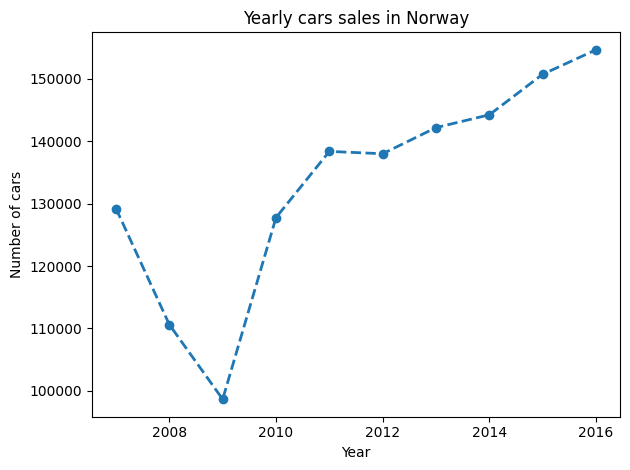

In [101]:
ax = df_yearly_quantity.iloc[:-1].plot(linewidth= 2, style= "--o")
ax.set(
    title="Yearly cars sales in Norway",
    ylabel= "Number of cars"
    )
ax.legend().remove()
fig = ax.get_figure()
fig.tight_layout()
fig.savefig("figures/cars_sold_line_charts.png")